<a href="https://colab.research.google.com/github/QuanRy/Machine_Learning/blob/main/lab_6/lab_6_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Загрузка данных
df = pd.read_csv("loan3000.csv", delimiter = ',')

In [ ]:
df.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [ ]:
# Удаление столбца id
df.drop(columns=['Unnamed: 0',	'purpose_'], inplace=True)

In [ ]:
df.head()

,outcome,dti,borrower_score,payment_inc_ratio
0,paid off,21.23,0.40,5.11135
1,default,15.49,0.40,5.43165
2,paid off,27.30,0.70,9.23003
3,paid off,21.11,0.40,2.33482
4,default,16.46,0.45,12.10320


In [ ]:
# Замена значений столбца sex
df['outcome'].replace({'paid off': 0, 'default' : 1}, inplace = True)


In [ ]:
df.head()

,outcome,dti,borrower_score,payment_inc_ratio
0,0,21.23,0.40,5.11135
1,1,15.49,0.40,5.43165
2,0,27.30,0.70,9.23003
3,0,21.11,0.40,2.33482
4,1,16.46,0.45,12.10320


In [ ]:
# Разделение на признаки и целевую переменную
X = df.drop(columns=['outcome'])
y = df['outcome']

In [ ]:
X.head()

,dti,borrower_score,payment_inc_ratio
0,21.23,0.40,5.11135
1,15.49,0.40,5.43165
2,27.30,0.70,9.23003
3,21.11,0.40,2.33482
4,16.46,0.45,12.10320


In [ ]:
# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели бустинга
model = GradientBoostingClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)


In [ ]:
# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 59.67%


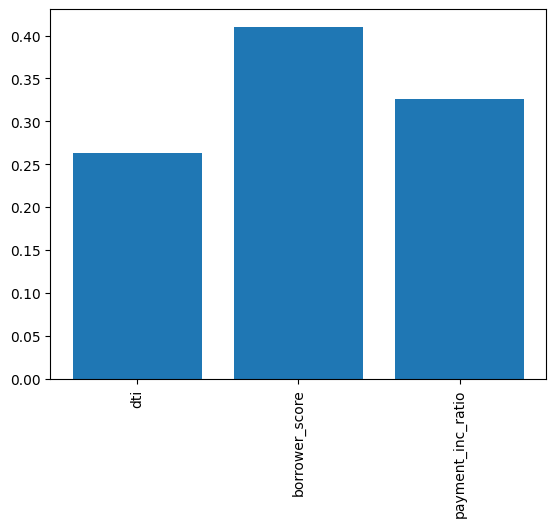

In [ ]:
# График важности признаков
importance = model.feature_importances_
plt.bar([x for x in X.columns], importance)
plt.xticks(rotation='vertical')
plt.show()